In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_data = pd.read_csv('../Codes - Datasets/fraudTrain.csv').iloc[:, 1:]
test_data = pd.read_csv('../Codes - Datasets/fraudTest.csv').iloc[:, 1:]

In [3]:
print('Sample of train_data:')
print('-' * 100)
display(train_data.sample(5))

print('\nDescription of numerical values:')
print('-' * 100)
display(train_data.describe())

Sample of train_data:
----------------------------------------------------------------------------------------------------


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
547817,2019-08-22 19:17:44,3550554389581384,fraud_Streich Ltd,home,70.22,Ryan,Foster,M,03921 Cole Mission Suite 882,Hampton,...,29.8575,-82.1483,2060,Oncologist,1983-11-10,da0ea7bb86d88dd9f96f18d0793d4066,1345663064,30.398245,-82.732734,0
592407,2019-09-08 14:46:29,375904527651269,fraud_Friesen-Ortiz,personal_care,18.62,Ryan,Cook,M,75952 Wilson Course,Roseland,...,40.4591,-98.5551,463,"Nurse, mental health",1948-05-31,e98d01ca0ef450d9ae8d5e76cbfe26fe,1347115589,40.478467,-98.724270,0
124655,2019-03-10 15:41:25,213161293389774,fraud_Schmidt-Larkin,home,89.10,Catherine,Weber,F,74890 Rodriguez Springs Apt. 540,West Henrietta,...,43.0397,-77.6871,10256,"Teacher, primary school",1968-06-24,89b75fd6966c7e5fdbfe2b375eae4647,1331394085,43.699965,-77.770540,0
976223,2020-01-31 12:38:06,6011724471098086,fraud_Botsford PLC,home,19.30,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,e3ac2b8275fb24bb573fc0ca1c0dffdd,1359635886,45.580803,-118.086056,0
384484,2019-06-25 03:52:54,4745996322265,"fraud_Tromp, Kerluke and Glover",grocery_net,24.79,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,...,41.4802,-86.6919,1423,"Psychologist, forensic",1998-10-07,4659e506b5dac250e92927899c71d399,1340596374,41.786985,-86.880007,0



Description of numerical values:
----------------------------------------------------------------------------------------------------


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Basic Information of the data

In [4]:
features = train_data.columns
print('\nSearching for any NULL value:')
print('-' * 100)
null_columns = []
for feature in features:
    if train_data[feature].isnull().sum() > 0:
        null_count = train_data[feature].isnull().sum()
        null_columns.append(f"{feature}: {null_count} null values")

if null_columns:
    print("Columns with Null Values:", null_columns)
else:
    print("No Null Values found in the dataset")

print('\nSearching for any duplicated row:')
print('-' * 100)
print(train_data.duplicated().sum())

print('\nShape of train_data:')
print('-' * 100)
print(train_data.shape)

print('\nShape of test_data:')
print('-' * 100)
print(test_data.shape)

print('\nCategorical Columns in train and test data:')
print('-' * 100)
for feature in features:
    if train_data[feature].dtype == 'object':
        print(f"{feature}, ", end="")
print('\n')        
print('\nNumerical Columns in train and test data:')
print('-' * 100)
for feature in features:
    if train_data[feature].dtype != 'object':
        print(f"{feature}, ", end="")


Searching for any NULL value:
----------------------------------------------------------------------------------------------------
No Null Values found in the dataset

Searching for any duplicated row:
----------------------------------------------------------------------------------------------------
0

Shape of train_data:
----------------------------------------------------------------------------------------------------
(1296675, 22)

Shape of test_data:
----------------------------------------------------------------------------------------------------
(555719, 22)

Categorical Columns in train and test data:
----------------------------------------------------------------------------------------------------
trans_date_trans_time, merchant, category, first, last, gender, street, city, state, job, dob, trans_num, 


Numerical Columns in train and test data:
----------------------------------------------------------------------------------------------------
cc_num, amt, zip, lat, l

In [5]:
train_data['first'].isnull().sum()

np.int64(0)

# Feature Engineering on Dataset

###  Here the correlation between [lat, merch_lat] and [long, merch_long] is ~ 1.00
#### So from this visualization we can drop one of each [lat, long]

<Axes: >

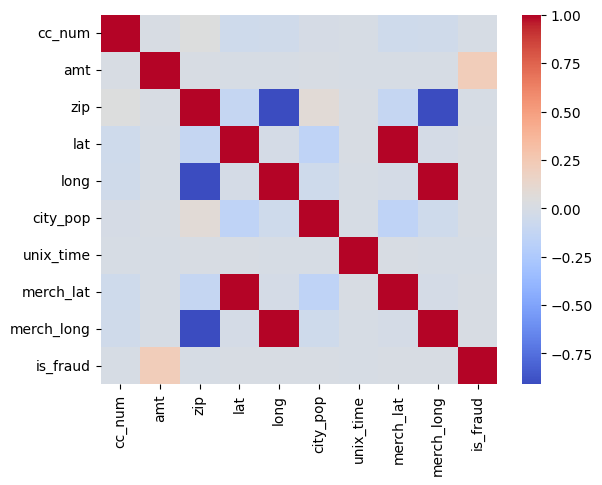

In [6]:
sns.heatmap(train_data.corr(numeric_only = True),cmap='coolwarm')

## In this section we are trying to get useful information from trans_date_trans_time column
#####  --With the help of day column extraction we can see the dfference of fraud actions on weekdays and weekend 
#####  --With the help of hour column extraction we can see the dfference of fraud actions at day and night
#####  --With the help of month column extraction we can see the dfference of fraud actions in first and second half of the year

In [7]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['month'] = train_data['trans_date_trans_time'].dt.month

test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day'] = test_data['trans_date_trans_time'].dt.day
test_data['month'] = test_data['trans_date_trans_time'].dt.month


train_data['day'] = np.where(train_data['day'] >= 5, 'Weekend', 'Weekday')
test_data['day'] = np.where(test_data['day'] >= 5, 'Weekend', 'Weekday')

train_data['hour'] = np.where(train_data['hour'].between(6, 18), 'Day', 'Night')
test_data['hour'] = np.where(test_data['hour'].between(6, 18), 'Day', 'Night')

train_data['month'] = np.where(train_data['month'] <= 6, 'First_Half', 'Second_Half')
test_data['month'] = np.where(test_data['month'] <= 6, 'First_Half', 'Second_Half')

train_data[['hour', 'day', 'month']] = train_data[['hour', 'day', 'month']].astype('object')

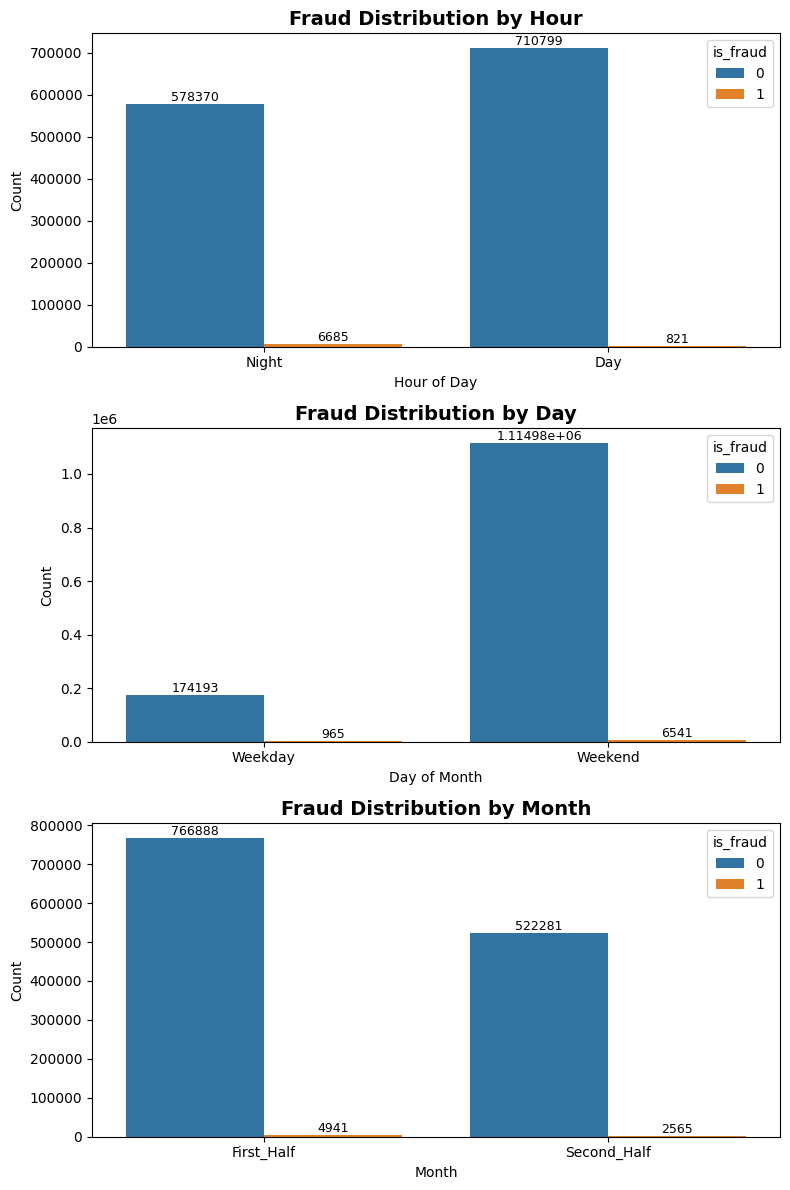

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))


sns.countplot(x='hour', data=train_data, hue='is_fraud', ax=axes[0])
axes[0].set_title('Fraud Distribution by Hour', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Count')

for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=9)


sns.countplot(x='day', data=train_data, hue='is_fraud', ax=axes[1])
axes[1].set_title('Fraud Distribution by Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Count')

for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=9)


sns.countplot(x='month', data=train_data, hue='is_fraud', ax=axes[2])
axes[2].set_title('Fraud Distribution by Month', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')

for container in axes[2].containers:
    axes[2].bar_label(container, fontsize=9)


plt.tight_layout()
plt.show()

## From above plots we can get a insight that on weekends or at night chance of getting fraud increases

In [9]:
train_data['birth_year'] = pd.to_datetime(train_data['dob']).dt.year
test_data['birth_year'] = pd.to_datetime(test_data['dob']).dt.year

train_data['age_category'] = train_data['birth_year'].apply(lambda x: 'Young' if x >= 1990 else 'Middle_Age' if x >= 1970 else 'Older')
test_data['age_category'] = test_data['birth_year'].apply(lambda x: 'Young' if x >= 1990 else 'Middle_Age' if x >= 1970 else 'Older')

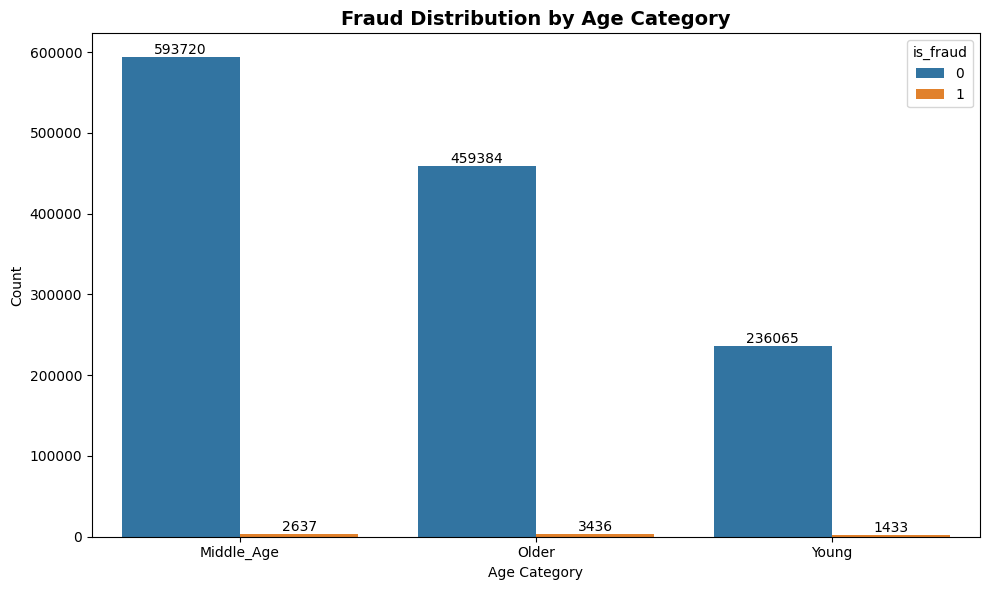

In [10]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(x='age_category', data=train_data, hue='is_fraud')

ax.set_title('Fraud Distribution by Age Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
train_data['merchant_category'] = train_data['merchant'].map(train_data['merchant'].value_counts()).apply(lambda x: 'High_Volume_Merchant' if x >= 3000 else 'Medium_Volume_Merchant' if x >= 1500 else 'Low_Volume_Merchant' if x >= 500 else 'Very_Low_Volume_Merchant')
test_data['merchant_category'] = test_data['merchant'].map(train_data['merchant'].value_counts()).fillna(0).apply(lambda x: 'High_Volume_Merchant' if x >= 3000 else 'Medium_Volume_Merchant' if x >= 1500 else 'Low_Volume_Merchant' if x >= 500 else 'Very_Low_Volume_Merchant')

train_data['gender_encoded'] = train_data['gender'].map({'F': 0, 'M': 1})
test_data['gender_encoded'] = test_data['gender'].map({'F': 0, 'M': 1})

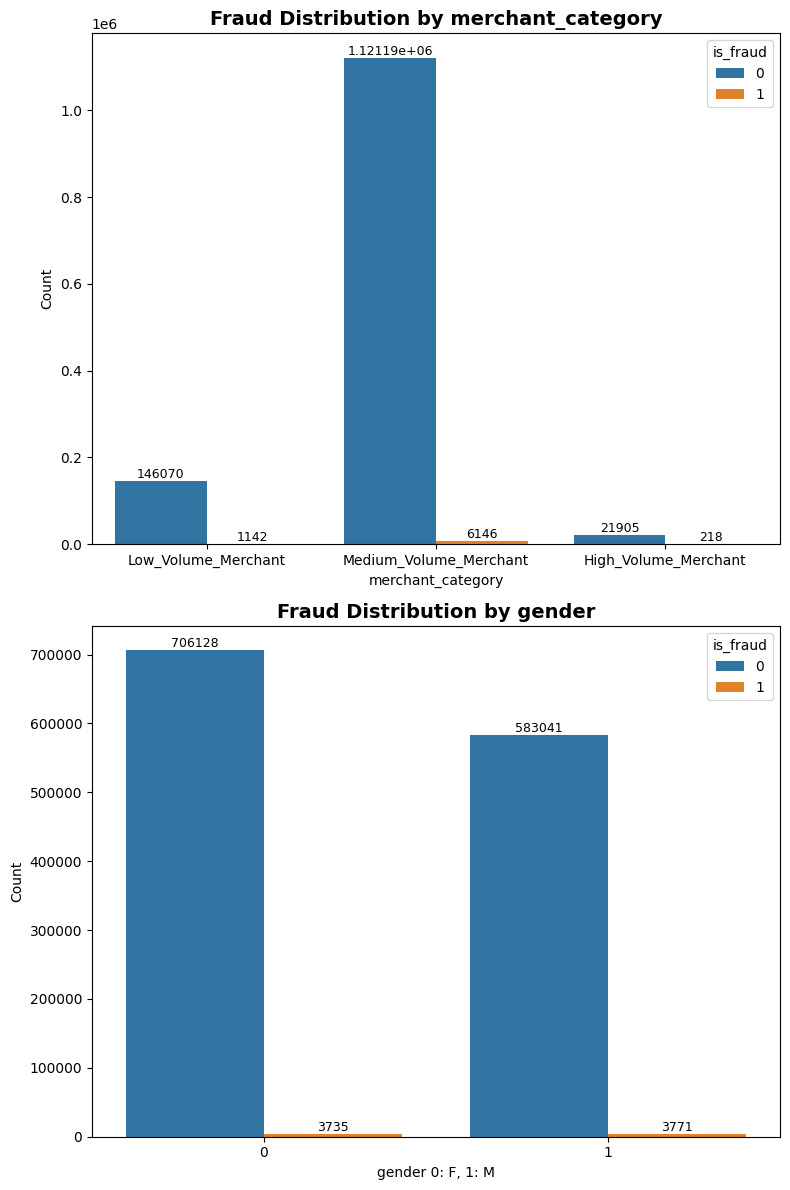

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))


sns.countplot(x='merchant_category', data=train_data, hue='is_fraud', ax=axes[0])
axes[0].set_title('Fraud Distribution by merchant_category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('merchant_category')
axes[0].set_ylabel('Count')

for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=9)


sns.countplot(x='gender_encoded', data=train_data, hue='is_fraud', ax=axes[1])
axes[1].set_title('Fraud Distribution by gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('gender 0: F, 1: M')
axes[1].set_ylabel('Count')

for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=9)


plt.tight_layout()
plt.show()

In [13]:
city_fraud_rates = train_data.groupby('city')['is_fraud'].mean()
train_data['city_fraud_rate'] = train_data['city'].map(city_fraud_rates)
city_fraud_rates = test_data.groupby('city')['is_fraud'].mean()
test_data['city_fraud_rate'] = test_data['city'].map(city_fraud_rates)

state_fraud_rates = train_data.groupby('state')['is_fraud'].mean() 
train_data['state_fraud_rate'] = train_data['state'].map(state_fraud_rates)
state_fraud_rates = test_data.groupby('state')['is_fraud'].mean() 
test_data['state_fraud_rate'] = test_data['state'].map(state_fraud_rates)

In [14]:
train_cat_dummies = pd.get_dummies(train_data['category'], prefix='cat',dtype='int', drop_first=True )
test_cat_dummies = pd.get_dummies(test_data['category'], prefix='cat', drop_first=True, dtype='int')


train_cat_dummies, test_cat_dummies = train_cat_dummies.align(test_cat_dummies, join='left', axis=1, fill_value=0)


train_data = pd.concat([train_data, train_cat_dummies], axis=1)
test_data = pd.concat([test_data, test_cat_dummies], axis=1)

In [15]:
train_data.drop(columns = ['merchant', 'gender','job','street', 'first', 'last','category', 'lat','state', 'city', 'long', 'unix_time', 'trans_num', 'trans_date_trans_time', 'dob', 'birth_year'], inplace = True, axis = 1)
test_data.drop(columns = ['merchant', 'gender','job','street', 'first', 'last','category', 'lat', 'state', 'city', 'long', 'unix_time', 'trans_num', 'trans_date_trans_time', 'dob', 'birth_year'], inplace = True, axis = 1)

In [16]:
columns = train_data.columns
obj_columns = []
for feature in columns:
    if train_data[feature].dtype == 'object':
        obj_columns.append(feature)
        print(f"\nValue counts for {feature}:")
        print(train_data[feature].value_counts())


Value counts for hour:
hour
Day      711620
Night    585055
Name: count, dtype: int64

Value counts for day:
day
Weekend    1121517
Weekday     175158
Name: count, dtype: int64

Value counts for month:
month
First_Half     771829
Second_Half    524846
Name: count, dtype: int64

Value counts for age_category:
age_category
Middle_Age    596357
Older         462820
Young         237498
Name: count, dtype: int64

Value counts for merchant_category:
merchant_category
Medium_Volume_Merchant    1127340
Low_Volume_Merchant        147212
High_Volume_Merchant        22123
Name: count, dtype: int64


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['hour', 'day', 'month', 'age_category', 'merchant_category'])
], remainder='passthrough')

train_1 = transformer.fit_transform(train_data)
test_1 = transformer.transform(test_data)

In [18]:
columns = [
'hour_night',
'day_weekend',
'month_second_half',
'age_older',
'age_young',
'Low_Volume_Merchant',
'High_Volume_Merchant',    
'cc_num',
 'amt',
 'zip',
 'city_pop',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'gender_encoded',
 'city_fraud_rate',
 'state_fraud_rate',
 'cat_food_dining',
 'cat_gas_transport',
 'cat_grocery_net',
 'cat_grocery_pos',
 'cat_health_fitness',
 'cat_home',
 'cat_kids_pets',
 'cat_misc_net',
 'cat_misc_pos',
 'cat_personal_care',
 'cat_shopping_net',
 'cat_shopping_pos',
 'cat_travel'
]

In [19]:
train_1 = pd.DataFrame(train_1, columns=columns)
test_1 = pd.DataFrame(test_1, columns=columns)

In [20]:
test_1.head()

,hour_night,day_weekend,month_second_half,age_older,age_young,Low_Volume_Merchant,High_Volume_Merchant,cc_num,amt,zip,...,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.291164e+15,2.86,29209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.573030e+15,29.84,84002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.598215e+15,41.28,11710.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.591920e+15,60.05,32780.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.526826e+15,3.19,49632.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model Predition Phase

In [21]:
X_train = train_1.drop(['is_fraud'], axis=1)
y_train = train_1['is_fraud']

In [22]:
X_test = test_1.drop(['is_fraud'], axis=1)
y_test = test_1['is_fraud']

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
col = sc.get_feature_names_out(X_train.columns)

In [24]:
X_train = pd.DataFrame(X_train_scaled, columns = col)
X_test = pd.DataFrame(X_test_scaled, columns = col)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [26]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

In [27]:
for name, model in models.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    
    precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
    recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
    
    print("Cross-validation Precision Scores:", precision_scores)
    print("Mean CV Precision: {:.4f}".format(precision_scores.mean()))
    print("Cross-validation Recall Scores:", recall_scores)
    print("Mean CV Recall: {:.4f}".format(recall_scores.mean()))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)



Logistic Regression
Cross-validation Precision Scores: [0.65027322 0.43049327 0.58928571 0.4845815  0.58917197]
Mean CV Precision: 0.5488
Cross-validation Recall Scores: [0.15856096 0.06395736 0.08794137 0.07328448 0.12316911]
Mean CV Recall: 0.1014
Test Accuracy: 0.9955
Test Precision: 0.3587
Test Recall: 0.2238
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.36      0.22      0.28      2145

    accuracy                           1.00    555719
   macro avg       0.68      0.61      0.64    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[552716    858]
 [  1665    480]]

Decision Tree
Cross-validation Precision Scores: [0.7063655  0.69522472 0.72335921 0.7006237  0.7055336 ]
Mean CV Precision: 0.7062
Cross-validation Recall Scores: [0.68754164 0.65956029 0.68287808 0.67355097 0.71304927]
Mean CV Recall: 0.6833
Test Accuracy: 0.9969
Test Precisi

# Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000)
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
log_grid = GridSearchCV(log_reg, log_params, cv=5, scoring='precision')
log_grid.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Logistic Regression Report:")
print(classification_report(y_test, log_grid.predict(X_test)))

best_model = log_grid.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision')
print("Cross-validation Precision Scores:", cv_scores)
print("Mean CV Precision: {:.4f}".format(cv_scores.mean()))

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.36      0.22      0.28      2145

    accuracy                           1.00    555719
   macro avg       0.68      0.61      0.64    555719
weighted avg       0.99      1.00      0.99    555719

Cross-validation Precision Scores: [0.65027322 0.43303571 0.58928571 0.48695652 0.58860759]
Mean CV Precision: 0.5496


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter space
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearchCV instead of GridSearchCV
dt_random = RandomizedSearchCV(
    estimator=dt,param_distributions=dt_params,n_iter=10,scoring='precision',n_jobs=-1,random_state=42
)

# Fit model
dt_random.fit(X_train, y_train)

# Evaluate
print("Best Decision Tree Parameters:", dt_random.best_params_)
print("Decision Tree Report:")
print(classification_report(y_test, dt_random.predict(X_test)))

# Cross-validation on best model
best_model = dt_random.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
print("Cross-validation Precision Scores:", cv_scores)
print("Mean CV Precision: {:.4f}".format(cv_scores.mean()))


Best Decision Tree Parameters: {'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}
Decision Tree Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.89      0.75      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.87      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Cross-validation Precision Scores: [0.84470588 0.83181818 0.85780526 0.83159463 0.84532925]
Mean CV Precision: 0.8423


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", random_search.best_params_)
print("Random Forest Report:")
print(classification_report(y_test, random_search.predict(X_test)))

best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
print("Cross-validation Precision Scores:", cv_scores)
print("Mean CV Precision: {:.4f}".format(cv_scores.mean()))